In [1]:
# python3 -m streamlit run Hawaii.py

# 1. Importando módulos y datos

## 1.1 Importamos los módulos a utilizar


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# Warnings
import warnings
warnings.filterwarnings('ignore')

## 1.2 Preprocesamiento del listado de viviendas



#### Generamos los Dataframes

In [3]:
print(os.listdir('/Users/pedrollamaslopez/Desktop/Curso_upgrade/Hawaii_airbnb/data'))

['listings_details.csv', 'reviews.csv', 'reviews_details.csv', 'neighbourhoods.geojson', 'neighbourhoods.csv', 'listings.csv', 'calendar.csv', 'state-civil-defense-hurricane-shelters-csv.csv', 'Honolulu_Police_Stations.csv']


In [4]:
listings = pd.read_csv('/Users/pedrollamaslopez/Desktop/Curso_upgrade/Hawaii_airbnb/data/listings.csv', index_col = 'id')
listings_details = pd.read_csv('/Users/pedrollamaslopez/Desktop/Curso_upgrade/Hawaii_airbnb/data/listings_details.csv', index_col = 'id')

calendar = pd.read_csv('//Users/pedrollamaslopez/Desktop/Curso_upgrade/Hawaii_airbnb/data/calendar.csv', parse_dates = ['date'], index_col = ['listing_id'])
reviews_details = pd.read_csv('/Users/pedrollamaslopez/Desktop/Curso_upgrade/Hawaii_airbnb/data/reviews_details.csv')


In [5]:
print(listings.shape)

(30064, 17)


In [6]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
listings_details.columns
# columnas interesantes 'host_since','host_response_time', 'host_is_superhost', 'property_type', 'accommodates', 'amenities', 'maximum_nights', 'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value'


Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [8]:
target_columns = ['host_since','host_response_time', 'host_is_superhost','host_response_rate', 'property_type', 'accommodates', 'amenities', 'maximum_nights', 'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value']
listings = pd.merge(listings, listings_details[target_columns], on = 'id', how = 'left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30064 entries, 3002 to 781562998595281314
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            30064 non-null  object 
 1   host_id                         30064 non-null  int64  
 2   host_name                       30062 non-null  object 
 3   neighbourhood_group             30064 non-null  object 
 4   neighbourhood                   30064 non-null  object 
 5   latitude                        30064 non-null  float64
 6   longitude                       30064 non-null  float64
 7   room_type                       30064 non-null  object 
 8   price                           30064 non-null  int64  
 9   minimum_nights                  30064 non-null  int64  
 10  number_of_reviews               30064 non-null  int64  
 11  last_review                     23290 non-null  object 
 12  reviews_per_mont

#### Valores nulos

In [9]:
# Hago un conteo del número de valores que tengo nulos por columna.
listings.isnull().sum()

name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6774
reviews_per_month                 6774
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5027
host_since                           2
host_response_time                1757
host_is_superhost                  106
host_response_rate                1757
property_type                        0
accommodates                         0
amenities                            0
maximum_nights                       0
first_review             

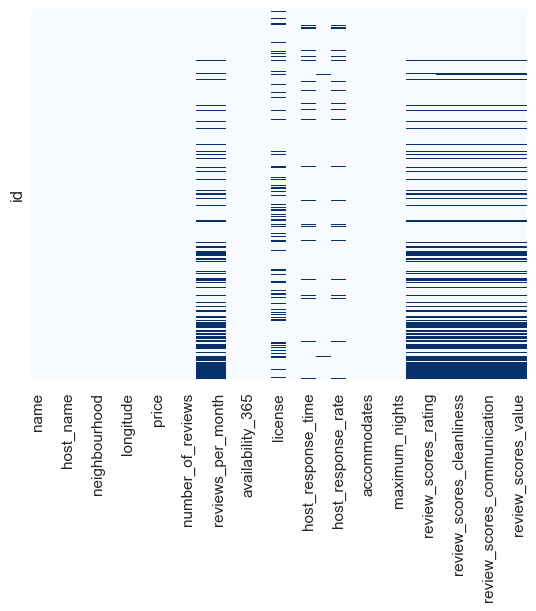

In [10]:
# Podemos sacar un mapeado de los valores nulos para comprobar las columnas que nos van a generar más problemas a la hora de analizar.
sns.heatmap(listings.isnull(), yticklabels=False, cbar=False, cmap="Blues");

In [11]:
# Saco en porcentajes los valores nulos por si fuera muy representativo el nº de valores nulos tomar una decisión sobre si debo o no dropear esa columna.
listings.isnull().mean()*100

name                               0.000000
host_id                            0.000000
host_name                          0.006652
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       22.531932
reviews_per_month                 22.531932
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           16.720995
host_since                         0.006652
host_response_time                 5.844199
host_is_superhost                  0.352581
host_response_rate                 5.844199
property_type                      0.000000
accommodates                    

In [12]:
listings['host_response_rate']

id
3002                  100%
5269                  100%
266804                 90%
67431                 100%
5387                  100%
                      ... 
781419578563973464     60%
781422723319426601     60%
781430125724465288     60%
781444449823439299    100%
781562998595281314    100%
Name: host_response_rate, Length: 30064, dtype: object

In [13]:
# Comprobamos las columnas 'host_name','license','host_since',  'host response time' y 'host_is_superhost' para ver que podemos hacer con sus valores nulos.
# Con la columna 'host_name' vamos a sustituir los valores nulos por 'Unknown'.
listings['host_name'].fillna('Unknown', inplace = True)

# Con la columna 'license' como tiene un componenete legal y nos interesa saber a posteriori si hay algún caso concreto que estudiar, lo sustituiremos por 'Unknown' también.
listings['license'].fillna('Unknown', inplace = True)

# Con la columna 'host_since' no vamos a rellenarla ni dropearla puesto que presuponer cuando se unieron o rellenar con un formato que no sea fecha desvirtuaría el dataframe.

# Con la columna 'host_response-time' tampoco vamos a tocarla puesto que alomejor podemos sacarla a posteriori usando las reviews que tengan, si tienen o bien no han sido alquilados todavía y por eso no tiene tiempo registrado.

# Con la columa 'host_is_superhost' al ser un valor tan inferior, un 0,3% la rellenamos con el valor más común que es 'f' de false.
listings['host_is_superhost'].fillna('f', inplace = True)

# Con la columna 'host_response_rate', dropearemos más adelante cuando le demos uso en la representación gráfica.



##### **Conclusión**: 
Las columnas relacionadas con las reviews, es decir, con las opiniones de los usuarios tienen un porcentaje superior al 20%. Sin embargo, vamos a utilizar sus datos ya que no es obligatorio en Airbnb dejar una opinión.

#### Valores duplicados

In [14]:
# Comprobamos cuántos valores duplicados
listings.duplicated().sum()

39

In [15]:
# Dropeamos los valores duplicados ya que puede interferir en nuestro análisis.
listings.drop_duplicates(inplace = True)

#### Tipos de valores y nombres de columnas
Vamos a sacar los tipos de valores en nuestras columnas para comprobar si tenemos que cambiar alguna a int o float.

In [16]:
# Sacamos los tipos de datos con un dtypes
listings.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
host_since                         object
host_response_time                 object
host_is_superhost                  object
host_response_rate                 object
property_type                      object
accommodates                        int64
amenities                         

In [17]:
# La columna 'host_since' la tenemos en formato string cuando nos interesaría más tenerlo en formato datetime.
listings['host_since'] = pd.to_datetime(listings['host_since'], format = '%Y/%m/%d')

# En la columna 'host_response_time' tenemos os valores clasificados con within, sería interesante sacar los valores y dejarlos por 'hours' 'hour' 'day, etc. Por si en el futuro queremos encodearlos.
listings['host_response_time'] = listings['host_response_time'].str.split()   # Le hacemos un split a la columna para separar los diferentes strings que tenemos.
listings['host_response_time'] = listings['host_response_time'].str.get(-1)   # Ya con esos valores separados cogemos el último que es el que nos interesa.

# La columna 'last_review' la pasamos a formato fecha
listings['last_review'] = pd.to_datetime(listings['last_review'], format = '%Y/%m/%d')

# La columna host_since también tiene que tener formato fecha
listings['host_since'] = pd.to_datetime(listings['host_since'], format = '%Y/%m/%d')

# La columna 'first_review' la pasamos a formato fecha.
listings['first_review'] = pd.to_datetime(listings['first_review'], format = '%Y/%m/%d')

In [ ]:
listings.to_csv('listings_procesado.csv')

# 2. Análisis exploratorio


## 2.1 Isla y vecindario

### Distribución por islas
Podemos ver como la isla con mayor oferta es Maui, seguido de Honolulu, Hawaii y Kauai.

In [ ]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))   # Se mete las latitudes en una tupla

map1 = folium.Map(location=[19.741755, -155.844437], zoom_start=7.4) # Ponemos en location donde queremos que enfoque el mapa al principio.
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
freq = listings['neighbourhood_group']. value_counts().sort_values(ascending=False)
freq.plot.bar(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

#### Distribución de precios que encontramos en Maui
Podemos observar que la mayor oferta ronda los 250 dólares.

In [ ]:
df1 = listings[listings.neighbourhood_group == "Maui"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show();
print ('El precio medio de estancia en Maui es de {} dólares.'.format(listings[listings.neighbourhood_group == "Maui"]['price'].mean()))

#### Distribución de precios que encontramos en Honolulu
Podemos observar que la mayor oferta ronda los 600 dólares.

In [ ]:
df2 = listings[listings.neighbourhood_group == "Honolulu"][["neighbourhood","price"]]
d1 = df2.groupby("neighbourhood").mean()
sns.distplot(d1)
plt.show();
print ('El precio medio de estancia en Honolulu es de {} dólares.'.format(listings[listings.neighbourhood_group == "Honolulu"]['price'].mean()))

#### Distribución de precios que encontramos en Hawaii
Podemos observar que la mayor oferta ronda los 300 dólares.

In [ ]:
df3 = listings[listings.neighbourhood_group == "Hawaii"][["neighbourhood","price"]]
d2 = df3.groupby("neighbourhood").mean()
sns.distplot(d2)
plt.show();
print ('El precio medio de estancia en Hawaii es de {} dólares.'.format(listings[listings.neighbourhood_group == "Hawaii"]['price'].mean()))

#### Distribución de precios que encontramos en Kauai
Podemos observar que la mayor oferta ronda los 450 dólares.

In [ ]:
df4 = listings[listings.neighbourhood_group == "Kauai"][["neighbourhood","price"]]
d3 = df4.groupby("neighbourhood").mean()
sns.distplot(d3)
plt.show();
print ('El precio medio de estancia en Kauai es de {} dólares.'.format(listings[listings.neighbourhood_group == "Kauai"]['price'].mean()))

### Distribución por vecindario

In [ ]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq = feq [feq > 400]
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Anuncios clasificados por vecindario", fontsize=20)
plt.xlabel('Cantidad de anuncios', fontsize=12)
plt.show()

In [ ]:
fig = px.scatter_3d(listings, x='accommodates', y='neighbourhood', z='price',
              color='room_type', size='price', size_max=18,
              symbol='neighbourhood_group', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
listings['price'].sort_values(ascending = False)

In [ ]:
# Mostramos a través de un scatrer los diferentes barrios junto con sus precios.
fig = px.scatter(listings, x = 'neighbourhood_group', y = "price", color = 'room_type')
fig.show()

Análisis: podemos observar que el rango de precios es algo sospechoso en algunas situaciones, ya que tenemos algunos precios como 100k en entire home o 42k en private room que no se corresponden con la realidad que hemos comprobado con el value_counts. Estudiaremos esos casos para ver que sucede.

In [ ]:
# Saco los 5 precios más altos para comprobar que efectivamente es raro el dato que nos aparece.
listings['price'].value_counts(ascending = False).head(5)

## 2.2. Tipos de propiedades y habitaciones

### 2.2.1. Tipos de habitaciones

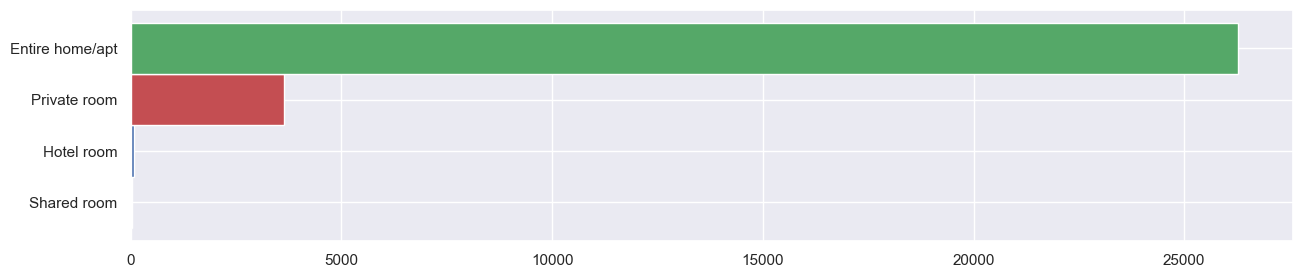

In [22]:
freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

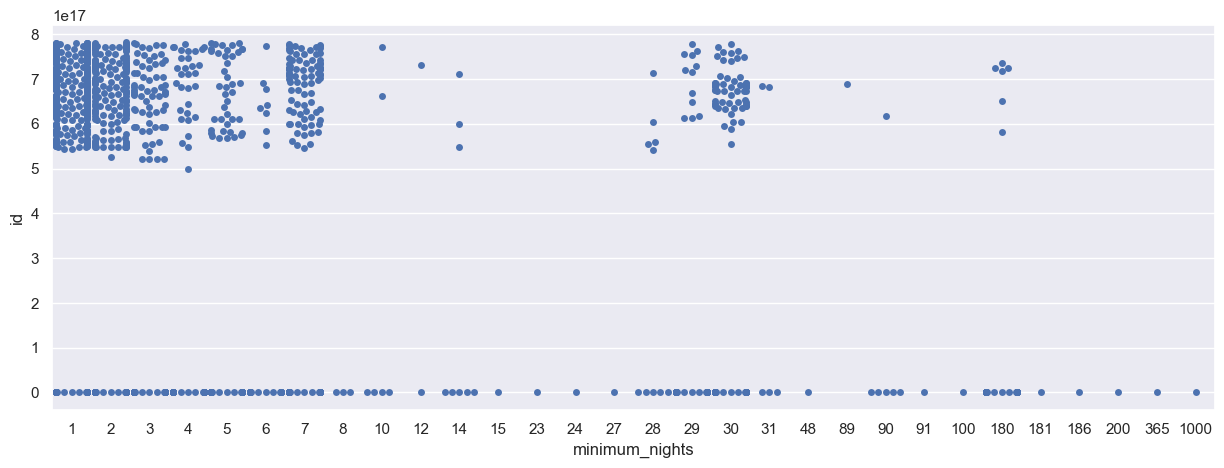

In [23]:
df5 = listings[listings['room_type'] == "Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df5.index,x= df5.values)
plt.xlabel("minimum_nights")
plt.show();

In [ ]:
df6 = listings[listings.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df6.index,x= df6.values)
plt.xlabel("minimum_nights")
plt.show();

In [ ]:
df7 = listings[listings.room_type=="Hotel room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df7.index,x= df7.values)
plt.xlabel("minimum_nights")
plt.show();

### 2.2.2. Tipos de propiedades

In [ ]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=400]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Tipos de propiedades en Hawaii', fontsize=18)
plt.xlabel('Cantidad de anunciados', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

### 2.2.3. Número de alojados

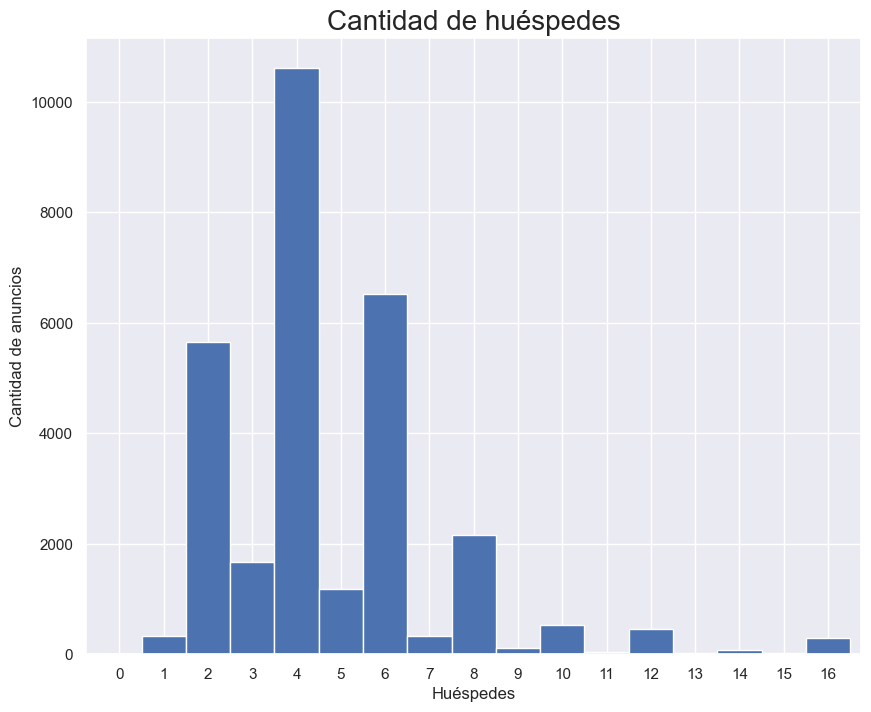

In [24]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Cantidad de huéspedes", fontsize=20)
plt.ylabel('Cantidad de anuncios', fontsize=12)
plt.xlabel('Huéspedes', fontsize=12)
plt.show()

La norma general de airbnb es un máximo de 16 huéspedes por oferta, por ello podemos ver que es el máximo que se representa en el gráfico superior. Hawaii por el contrario tiene alguna norma en función de la isla en lo que se refiere a huéspedes.
En el condado de Honolulu, los Bed & Breakfast tienen un límite máximo de 4 personas, es por ello que podemos ver una mayoría de 4 personas en los anuncios.
Como podemos comprobar no existe ningún anuncio que tenga bed and breakfast y tenga más de 4 huéspedes ofertados, así que cumplen la normativa.

In [ ]:
# Vamos a comprobar si existe algún Bed & Breakfast con una oferta superior a 4 personas.
listings[(listings['room_type'].str.contains('bed and breakfast')) & (listings['accommodates'] > 4)]

# 3. Análisis al servicio del gobierno
**Definición de Hawaii sobre alquileres a corto plazo**
El estado de Hawaii no tiene una definición unificada respecto a los alquileres a corto plazo. La mayoría de ciudades lo definen como aquellos alojamientos que se alquilan por menos de 30 días consecutivos, a cambio de una remuneración. Otros lugares, como Honolulu, expanden ese criterio para incluir anuncios cuya duración llegue hasta 90 días.


**Deducción fiscal en Hawaii**
De acuerdo a la normativa federal, los propietarios de Airbnbs en Hawaii tienen acceso a tener deducciones fiscales si alquilan una vivienda al menos 14 días al año. El estado de Hawaii lleva a cabo esta deducción con el objetivo de facilitar una mayor oferta de alojamientos vacacionales y favorecer a los inversores recuperar su inversión.


**Novedades alquileres a corto plazo en Honolulu**
Los Bed & Breakfast que están siendo actualmente alquilados en periodos de 30 - 89 días serán considerados a partir del 23 de Abril de 2023 como alojamientos a largo plazo. Por lo tanto, pasarán a tener otra consideración legal.


**Alquileres a corto plazo en Kauai**
El condado de Kauai es otra zona del estado de Hawaii que ha establecido regulaciones restrictivas respecto a Airbnb.
Los B & B, no tienen permitido ser alquilados por más de 29 días seguidos y el dueño del mismo se tiene que encontrar presente en la isla durante su alquiler.




## 3.1. Encontrando potenciales alojamientos que marcan de límite 14 días para beneficiarse de las deducciones.
Como hemos visto anteriormente, en Hawaii se proporciona una deducción para aquellas viviendas que se alquilen por 14 días al año, de ahí en parte la gran oferta que hay en Hawaii.
Podemos comprobar si hay personas que quieren únicamen beneficiarse de dicha deducción estableciendo un mínimo de noches de 14 exactamente.

In [ ]:
listings[(listings['neighbourhood_group'] == 'Hawaii') & (listings['minimum_nights'] == 14)]

Como podemos observar tenemos un total de 23 anuncios con exactamente 14 días de mínima estancia en su alojamiento, por lo que podemos deducir que son personas que quieren asegurarse la deducción de impuestos que proporciona Hawaii county.

## 3.2. Comprobando viviendas que tendrán que convertirse en alquileres a largo plazo.
A partir del 23 de Abril de este año, en Hawaii, aquellas viviendas que se alquiler por más de 30 días y menos de 89 pasarán a tener la consideración de 'long-term', por lo tanto vamos a ver cuáles cumplen esa condición ya que sería interesante avisarles o bien por parte del Estado o de Airbnb para evitar que incumplan la normativa dentro de poco.

In [ ]:
listings[(listings['neighbourhood_group'] == 'Hawaii') & (listings['maximum_nights'] < 89) & (listings['maximum_nights'] > 30) & (listings['minimum_nights'] > 29)]

Podemos observar que existen un total de 8 anuncios que cuentan con las condiciones que la nueva normativa de Hawaii establecerá como alojamientos de largo plazo. 
Sería interesante por parte de Airbnb notificar a estos alojamientos del cambio de normativa para evitar que a partir del 23 de Abril incumplan con la nueva normativa.
Como presunto cliente nuestro, deberíamos asesorar a Airbnb de ponerse en contacto con los mismos y estudiar su situación, pueden ser personas conscientes de la normativa haciendo un mal uso de la aplicación o personas que desconocen el cambio de normativa.



## 3.3. Comprobando viviendas que incumplen la normativa de 90 días.
Como sabemos aquellas viviendas que estén alquiladas por más de 90 días deberían estar inscritas como viviendas de alquiler a largo plazo. 

Debemos estudiar si contamos con viviendas que estén haciendo un mal uso de la aplicación estableciendo un mínimo de noches de 89 o 90 días, ya que puede haebr gente que establezca 89 como límite para evitar la detección automática del sistema.

In [ ]:
listings[listings['minimum_nights'] > 88]

Como podemos ver, encontramos un total de 596 viviendas anunciadas en Airbnb que están utilizando la aplicación para realizar alquileres a largo plazo.

Nuestra obligación es asesorar a Airbnb que se ponga en contacto con las autoridades para que comprueben si esas relaciones contractuales son fraudulentas.

## 3.4. Comprobando si hay B & B que no cumplen con la normativa de Kauai de 29 días.
Como hemos visto, los Bed and Breakfast en Kauai tienen como norma proporcionar estancias de máximo 29 días a los huéspedes. Por lo que queremos comprobar si existen anuncios en Airbnb que se anuncien como B & B pero proporcionen estancias superiores a 29 días.

In [ ]:
listings[(listings['neighbourhood_group'] == 'Kauai') & (listings['minimum_nights'] > 29) & (listings['property_type'] == 'Private room in bed and breakfast')]

Hemos encontrado tan sólo 3 anuncios corresponientes al mismo anunciante que incumplen con la normativa en lo que respecta a Bed & Breakfast. 
El anunciante tiene establecido el mismo límite de 180 noches para alquilar cualquier de sus tres habitaciones privadas con la consideración de 'habitación privada en un Bed and Breakfast'.
Por lo tanto, deberíamos aconsejar a Airbnb que se ponga en contacto con el anunciante o las autoridades correspondientes puesto que no se permite alquilar por encima de 29 días un B & B.

# 4. Consejos para el turismo

## 4.1. Precio medio por isla
En primer lugar, nos interesa ofrecer al posible visitante a Hawaii la isla más interesante en cuanto al precio y lo que ofrece. Empezamos estudiando los precios medios de las islas para comprobarlo.

### 4.1.1. Isla de Maui

En primer lugar vamos a estudiar el caso de una pareja que desea visitar Maui, es decir, dos personas adultas.

Podemos ver que la zona más barata es Molokai, que no supera los 200$ y la más cara Lahaina con una diferencia significativa.

In [ ]:
feq = listings[listings['accommodates']==2]
feq = listings[listings['neighbourhood_group'] == 'Maui']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
feq.plot.barh(figsize=(10, 8), color=['#ffff82', '#f5f7dc', '#b5d99c', '#0f0326', '#e65f5c', '#758ecd', '#328FA0', '#C0DBB2'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para una pareja en Maui", fontsize=20)
plt.xlabel('Precio medio (€)', fontsize=12)
plt.ylabel("")
plt.show();

Por último, vamos a comprobar si acudir con un grupo de 8 personas marca la diferencia puesto que ya no se podría acudir a un B & B.

Debido a que existen una gran variedad de amplias viviendas en Maui, la oferta para grupos grandes como familias o amigos es amplía y no afecta al precio significativamente.

In [ ]:
feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Maui']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para una pareja en Maui", fontsize=20)
plt.xlabel('Precio medio (€)', fontsize=12)
plt.ylabel("")
plt.show();

In [ ]:
feq = listings[listings['accommodates']==2] 
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True) 
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson") 
feq = pd.DataFrame([feq]) 
feq = feq.transpose() 

adam = pd.merge(adam, feq, on='neighbourhood', how='left') 
adam.rename(columns={'price': 'average_price'}, inplace=True) 
adam.average_price = adam.average_price.round(decimals=0) 
adam = adam.dropna(subset=['average_price']) 

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict() 
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price') 
def get_color(feature): 
    value = map_dict.get(feature['properties']['neighbourhood']) 
    if value is None: 
        return '#BADADA' 
    else: 
        return color_scale(value) 
    
map3 = folium.Map(location=[20.86011273793438, -156.52735903395032], zoom_start=10) 
folium.GeoJson(data=adam, 
               name='Hawaii', 
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True, 
                                                      sticky=False), 
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1, 
                   'dashArray': '5, 5', 
                   'fillOpacity':0.9 }, 
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3) 
map3.add_child(color_scale)

### 4.1.2. Isla de Kauai
Estudiamos la isla de Kauai, para comprobar la distribución de precios en esa isla.

En esta ocasión, analizaremos únicamente si existe diferencia entre una pareja y un grupo de 8.

Ya podemos obsevar que la oferta de lujo, es decir, las mejores acomodaciones son más baratas que en Maui. Sin embargo, podemos ver que la oferta más baja es superior en precio a Maui, ya que supera los 300$ la más barata.

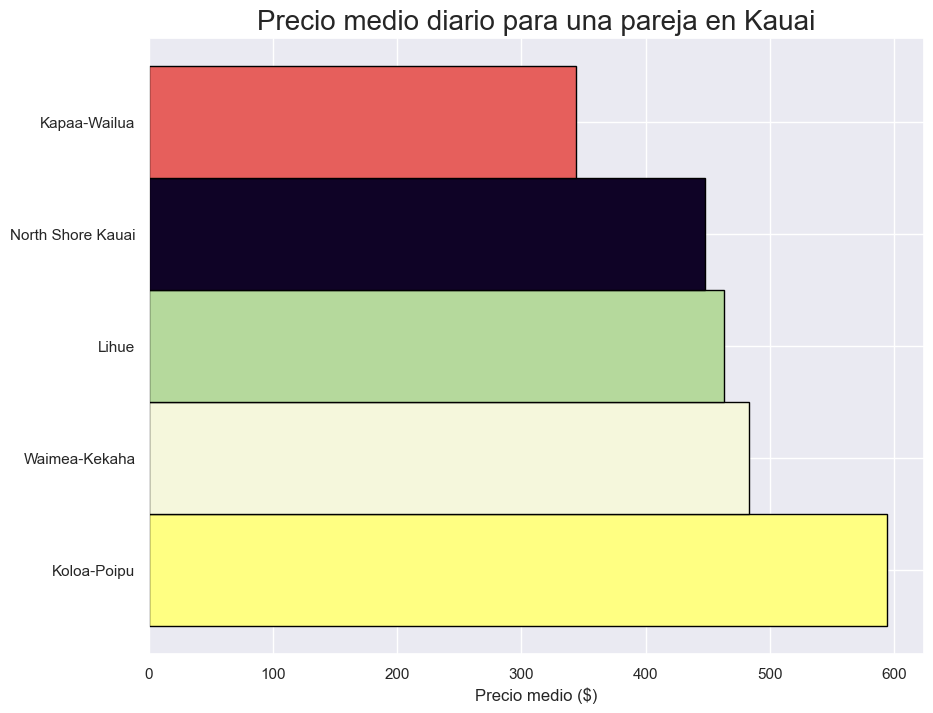

In [20]:
feq = listings[listings['accommodates']==2]
feq = listings[listings['neighbourhood_group'] == 'Kauai']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
feq.plot.barh(figsize=(10, 8), color=['#ffff82', '#f5f7dc', '#b5d99c', '#0f0326', '#e65f5c', '#758ecd', '#328FA0', '#C0DBB2'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para una pareja en Kauai", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

Comprobamos si existe una diferencia para un grupo amplio de 8 personas.

In [ ]:
feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Kauai']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para 8 personas en Kauai", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

In [18]:
feq = listings[listings['accommodates']==2] 
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True) 
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson") 
feq = pd.DataFrame([feq]) 
feq = feq.transpose() 

adam = pd.merge(adam, feq, on='neighbourhood', how='left') 
adam.rename(columns={'price': 'average_price'}, inplace=True) 
adam.average_price = adam.average_price.round(decimals=0) 
adam = adam.dropna(subset=['average_price']) 

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict() 
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price') 
def get_color(feature): 
    value = map_dict.get(feature['properties']['neighbourhood']) 
    if value is None: 
        return '#BADADA' 
    else: 
        return color_scale(value) 
    
map3 = folium.Map(location=[22.073414994647898, -159.5257299787407], zoom_start=10) 
folium.GeoJson(data=adam, 
               name='Hawaii', 
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True, 
                                                      sticky=False), 
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1, 
                   'dashArray': '5, 5', 
                   'fillOpacity':0.9 }, 
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3) 
map3.add_child(color_scale)

### 4.1.3. Honolulu

Como podemos ver existe una mayor variedad de ofertas respecto a Kauai y bastante similar a la oferta de Maui, esto puede ser debido a que el aeropuerto de Honolulu es más accesible y por lo tanto al recibir mayor cantidad de turistas, abarca mucho público.

Por otro lado, podemos observar que existe una oferta 'barata' relativamente más accesible que el resto de islas, con precios diarios que rondan los 150 dólares para una pareja.

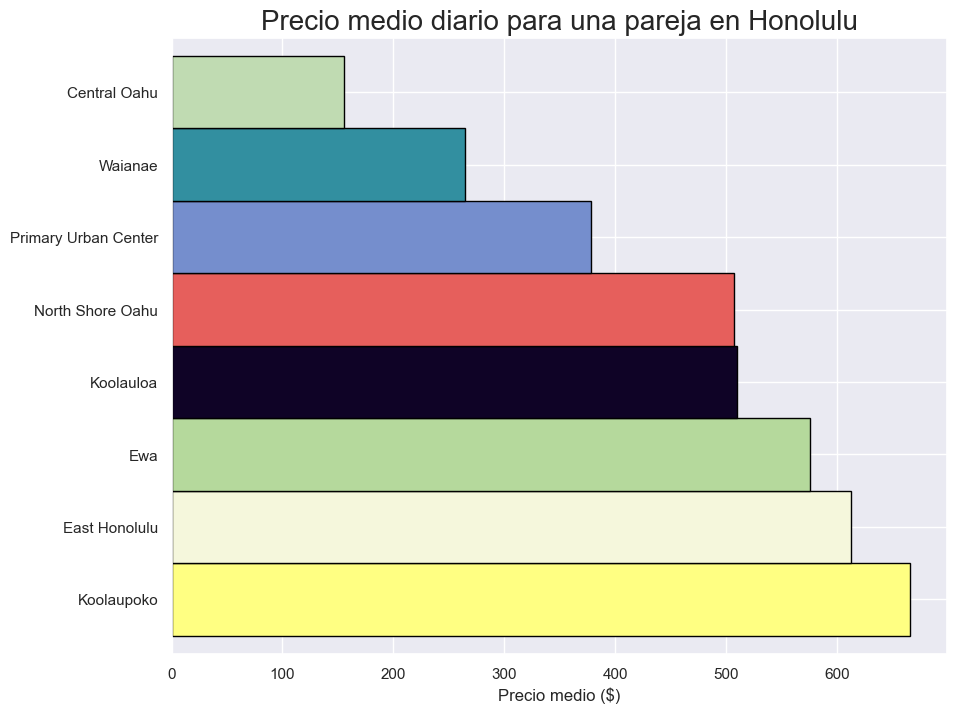

In [22]:
feq = listings[listings['accommodates']==2]
feq = listings[listings['neighbourhood_group'] == 'Honolulu']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
feq.plot.barh(figsize=(10, 8), color=['#ffff82', '#f5f7dc', '#b5d99c', '#0f0326', '#e65f5c', '#758ecd', '#328FA0', '#C0DBB2'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para una pareja en Honolulu", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

Observamos si existe una diferencia significativa siendo una familia o grupo amplio de 8 personas.

Vemos que no existe una diferencia significativa y por lo tanto también se trata de una isla accesible para un grupo mayor.

In [ ]:
feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Honolulu']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para un grupo de 8 en Honolulu", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

In [ ]:
feq = listings[listings['accommodates']==2] 
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True) 
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson") 
feq = pd.DataFrame([feq]) 
feq = feq.transpose() 

adam = pd.merge(adam, feq, on='neighbourhood', how='left') 
adam.rename(columns={'price': 'average_price'}, inplace=True) 
adam.average_price = adam.average_price.round(decimals=0) 
adam = adam.dropna(subset=['average_price']) 

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict() 
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price') 
def get_color(feature): 
    value = map_dict.get(feature['properties']['neighbourhood']) 
    if value is None: 
        return '#BADADA' 
    else: 
        return color_scale(value) 
    
map3 = folium.Map(location=[21.47390943260042, -157.99133209364058], zoom_start=10) 
folium.GeoJson(data=adam, 
               name='Hawaii', 
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True, 
                                                      sticky=False), 
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1, 
                   'dashArray': '5, 5', 
                   'fillOpacity':0.9 }, 
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3) 
map3.add_child(color_scale)

### 4.1.4. Hawaii
La isla más conocida y con mayor oferta, por lo que deberíamos observar un mayor rango de precio, similar a la de Honolulu.

Vemos que es donde se encuentra la zona más exclusiva de las islas junto a Lahaina en Maui, en este caso, con una diferenciación respecto al resto de zonas bastante significativa. 

Pero por otro lado, también existe una oferta más económica alrededor de 200$ la noche.

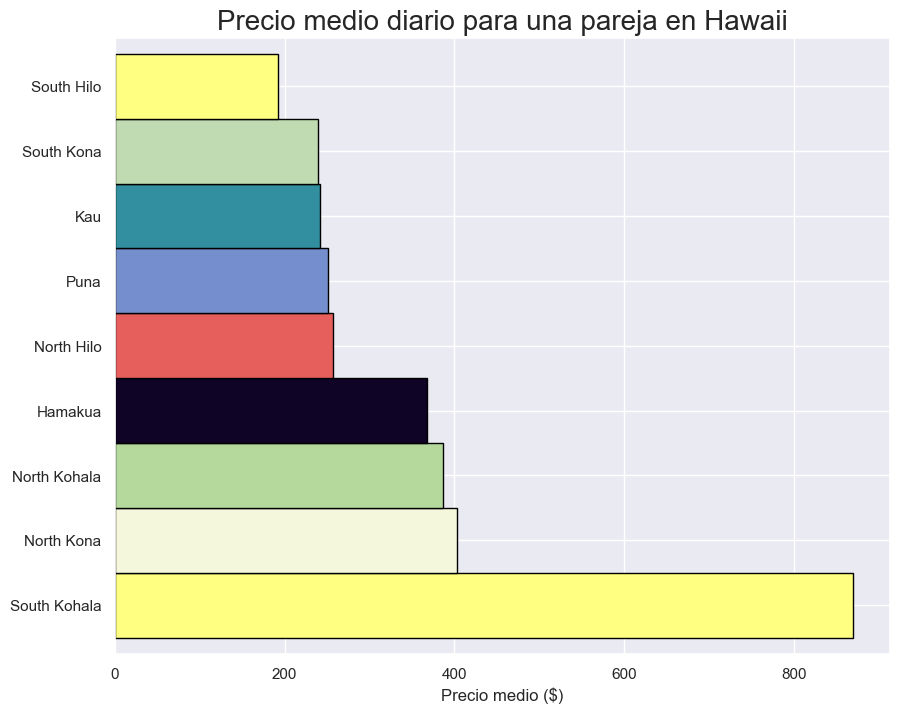

In [25]:
feq = listings[listings['accommodates']==2]
feq = listings[listings['neighbourhood_group'] == 'Hawaii']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
feq.plot.barh(figsize=(10, 8), color=['#ffff82', '#f5f7dc', '#b5d99c', '#0f0326', '#e65f5c', '#758ecd', '#328FA0', '#C0DBB2'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para una pareja en Hawaii", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

In [ ]:
feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Hawaii']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para un grupo de 8 personas en Hawaii", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

In [ ]:
feq = listings[listings['accommodates']==2] 
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True) 
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson") 
feq = pd.DataFrame([feq]) 
feq = feq.transpose() 

adam = pd.merge(adam, feq, on='neighbourhood', how='left') 
adam.rename(columns={'price': 'average_price'}, inplace=True) 
adam.average_price = adam.average_price.round(decimals=0) 
adam = adam.dropna(subset=['average_price']) 

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict() 
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price') 
def get_color(feature): 
    value = map_dict.get(feature['properties']['neighbourhood']) 
    if value is None: 
        return '#BADADA' 
    else: 
        return color_scale(value) 
    
map3 = folium.Map(location=[19.618612200526616, -155.52568556129822], zoom_start=9) 
folium.GeoJson(data=adam, 
               name='Hawaii', 
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True, 
                                                      sticky=False), 
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1, 
                   'dashArray': '5, 5', 
                   'fillOpacity':0.9 }, 
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3) 
map3.add_child(color_scale)

## 4.2. Seguridad en Hawaii

### 4.2.1. Huracanes
En verano hay una mayor probabilidad de que las Islas Hawaianas sean golpeadas por ciclones tropicales u huracanes. La cuenca hidrográfica del Pacífico Central experimenta ciclones de junio a noviembre, sin embargo son más probables entre julio y octubre. Agosto es el mes máximo para los huracanes que pueden acercarse a las islas desde el este.

La buena noticia para todos los que planean unas vacaciones en este momento es que Hawaii es golpeado por huracanes muy raramente debido a su característica de alta presión que mantiene el tiempo estable y cálido durante todo el año.

Tenemos un dataset público extraído de https://opendata.hawaii.gov/dataset/state-civil-defense-hurricane-shelters donde podemos encontrar posibles refugios en caso de huracanes.

In [26]:
huracanes = pd.read_csv('/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/state-civil-defense-hurricane-shelters-csv.csv')
huracanes

Hurricane Shelter Special Needs Pet Friendly  Island  \
0               Kaala Elementary             S           NaN    OAHU   
1                       Hana High           NaN          NaN    MAUI   
2          Kohala Intermediate                S          NaN  HAWAII   
3            Halawa District Park           NaN          NaN    OAHU   
4             Honowai Elementary             S           NaN    OAHU   
..                            ...           ...          ...     ...   
228            Hookena Elementary           NaN          NaN  HAWAII   
229              Keolu Elementary           NaN          NaN    OAHU   
230         Waiakea Elementary                S          NaN  HAWAII   
231                Campbell High              S           P     OAHU   
232  Kapaa Elementary School                  S          NaN   KAUAI   

     Zip Code (none)                                         Location 1  
0     96786.0    NaN  130 California Avenue\nWahiawa, HI\n(21.493754...  
1     96713.0    NaN  4111 Hana Highway\nHana, HI\n(20.7756004587104...  
2     96755.0    NaN  534155 Akoni Pule Highway\nKapaau, HI\n(20.226...  
3     96701.0    NaN                   99-795 Iwaiwa Street\nHalawa, HI  
4     96797.0    NaN  94-600 Honowai Street\nWaipahu, HI\n(21.384549...  
..        ...    ...                                                ...  
228   96704.0    NaN  86-4355 Mamalahoa Highway\nCaptain Cook, HI\n(...  
229   96734.0    NaN  1416 Keolu Drive\nKailua, HI\n(21.370897682785...  
230   96720.0    NaN  180 W. Puainako Street\nHilo, HI\n(19.69445824...  
231       NaN    NaN  91-980 North Rd\nEwa Beach, HI\n(21.3160660186...  
232   96746.0    NaN  4886 Kawaihau Road\nKapaa, HI\n(22.08901118854...  

[233 rows x 7 columns]

In [27]:
huracanes.isnull().sum()
# En la columna special needs, aquellos valores nulos serán tomados como no.
# En la columna pet friendly, aquellos valores nulos también tendrán la consideración de que no aceptan.
# La columna (none) la vamos a dropear.
# Dropearemos los refugios de los que no tenemos dirección.

Hurricane Shelter      0
Special Needs         76
Pet Friendly         178
Island                 0
Zip Code               5
(none)               232
Location 1             3
dtype: int64

In [28]:
huracanes.drop("(none)", axis = 1, inplace=True)
huracanes['Special Needs'].fillna('No', inplace =True)
huracanes['Pet Friendly'].fillna('No', inplace = True)
huracanes['Location 1'].dropna(inplace = True)

In [29]:
huracanes['Coordenadas'] = huracanes['Location 1'].str.extract('\((.*?)\)')
huracanes.dropna(subset=['Coordenadas'], inplace=True)

In [30]:
huracanes['Coordenadas'] = huracanes['Coordenadas'].str.split(',')
huracanes['latitud'] = huracanes['Coordenadas'].str[0]
huracanes['longitud'] = huracanes['Coordenadas'].str[1]
huracanes.drop(columns=['Coordenadas'], inplace = True)

In [ ]:
m = folium.Map(location=[19.741755, -155.844437], zoom_start=7.4, tiles="Stamen Terrain")

for lat, lon, shelter, special_needs, pet_friendly in zip(huracanes['latitud'],huracanes['longitud'],huracanes['Hurricane Shelter'],huracanes['Special Needs'],huracanes['Pet Friendly']):
  marker_color = 'blue'
  if special_needs == 'S' and pet_friendly == 'P':
    marker_color = 'yellow'
  elif special_needs == 'S' and pet_friendly == 'No':
    marker_color = 'red'
  elif pet_friendly == 'P' and special_needs == 'No':
    marker_color = 'purple'
  folium.Marker(
    [lat, lon], popup=f"<b>Hurricane Shelter: {shelter} <br> Special Needs: {special_needs} <br> Pet Friendly: {pet_friendly} </b>",
    icon=folium.Icon(color=marker_color, icon = 'flag')
).add_to(m)


m

In [31]:
huracanes.to_csv("refugios.csv")

## 4.3. Review scores location, location vs price.

Primero sacamos la media de nota de las opiniones en función de la isla, para ver que isla está mejor valorada sus alojamientos y comparamos con el precio diario para ver si merece la pena.

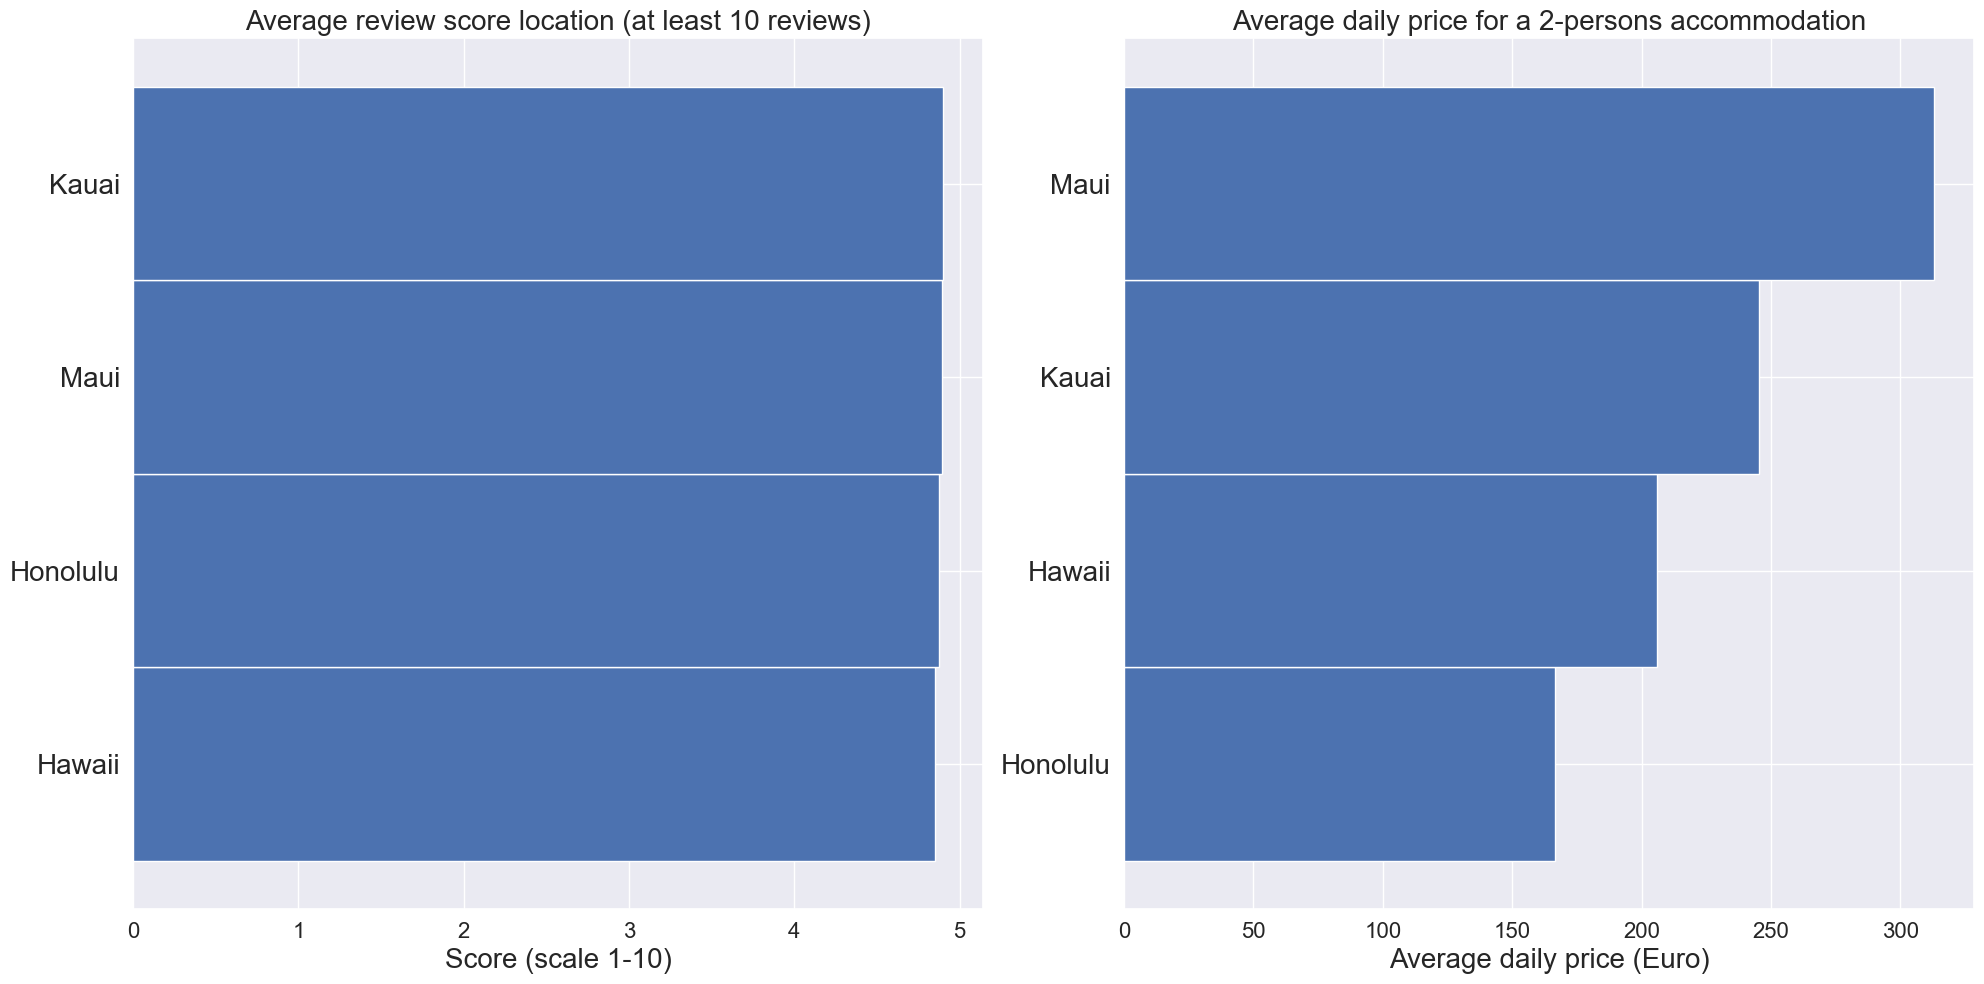

In [44]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood_group')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

En segundo lugar, sacamos por vecindario para encontrar una 'perlita', es decir, un barrio con precio medio y reviews scores positivas altas.

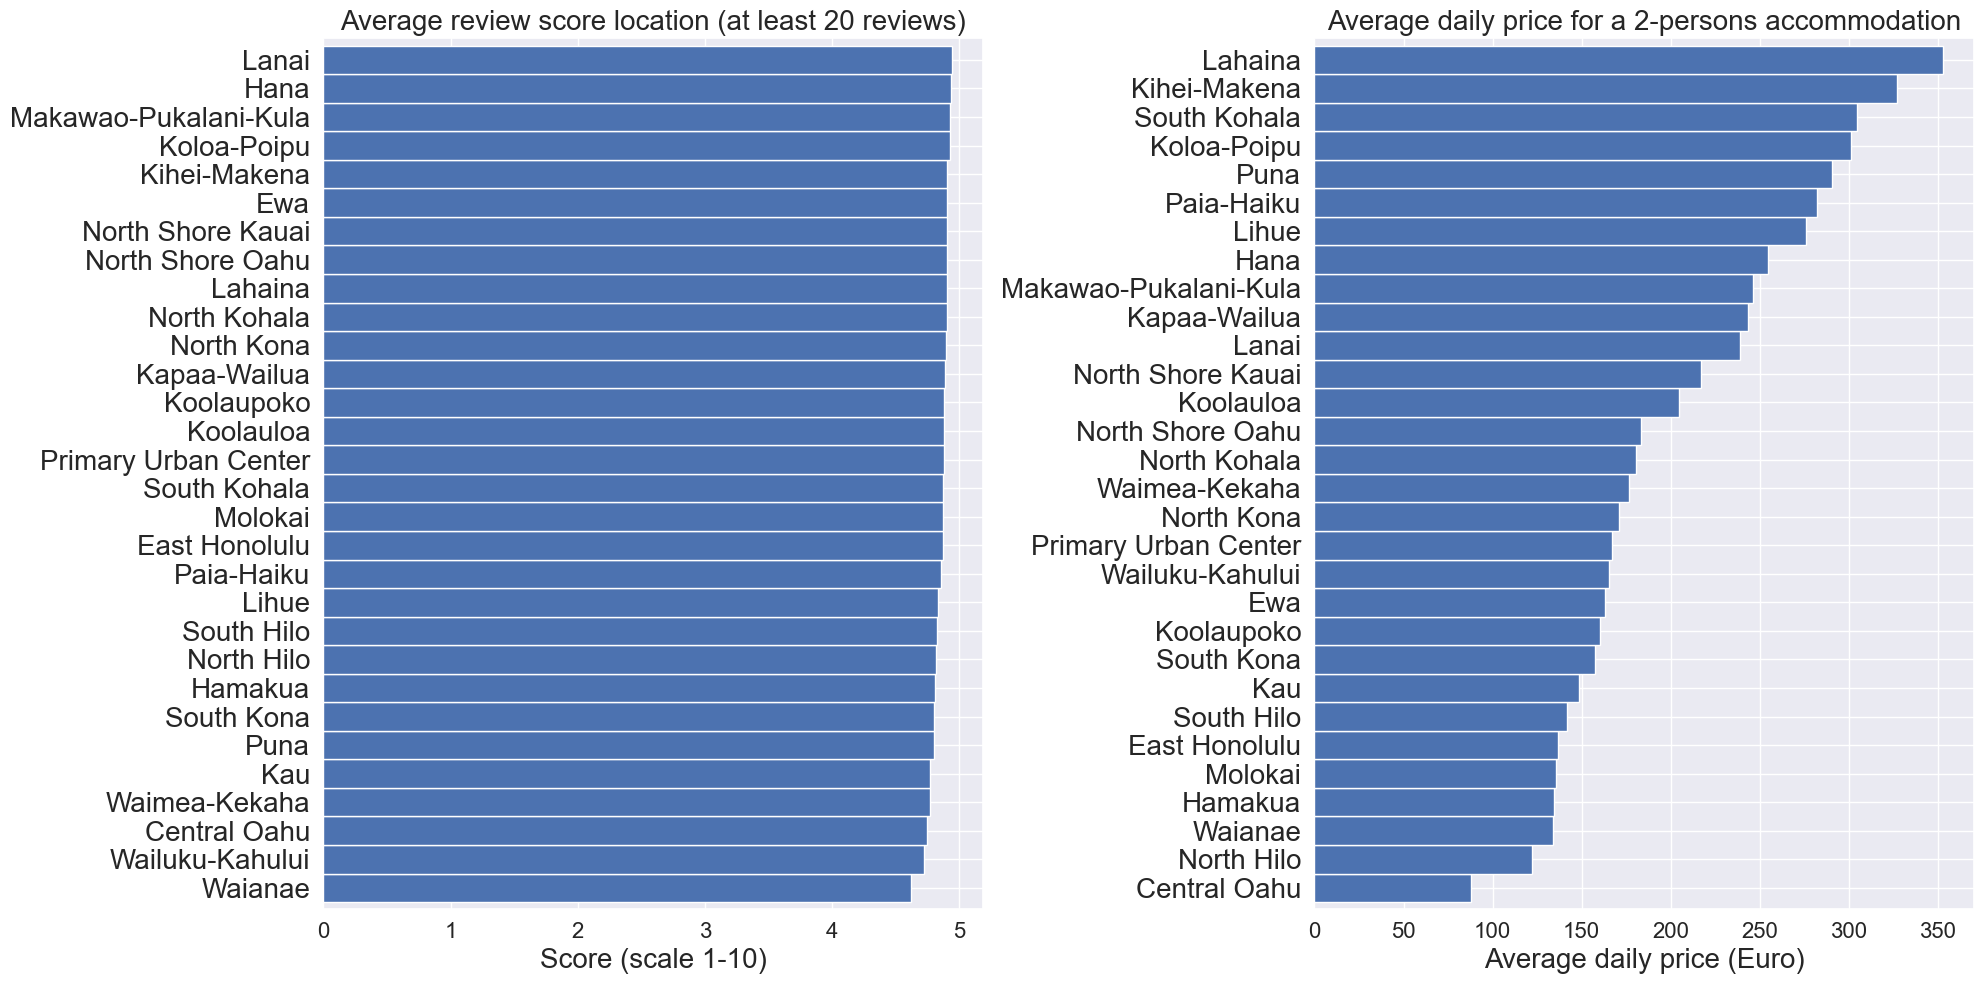

In [33]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=20]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 20 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 4.4. Puntuaciones de las reviews

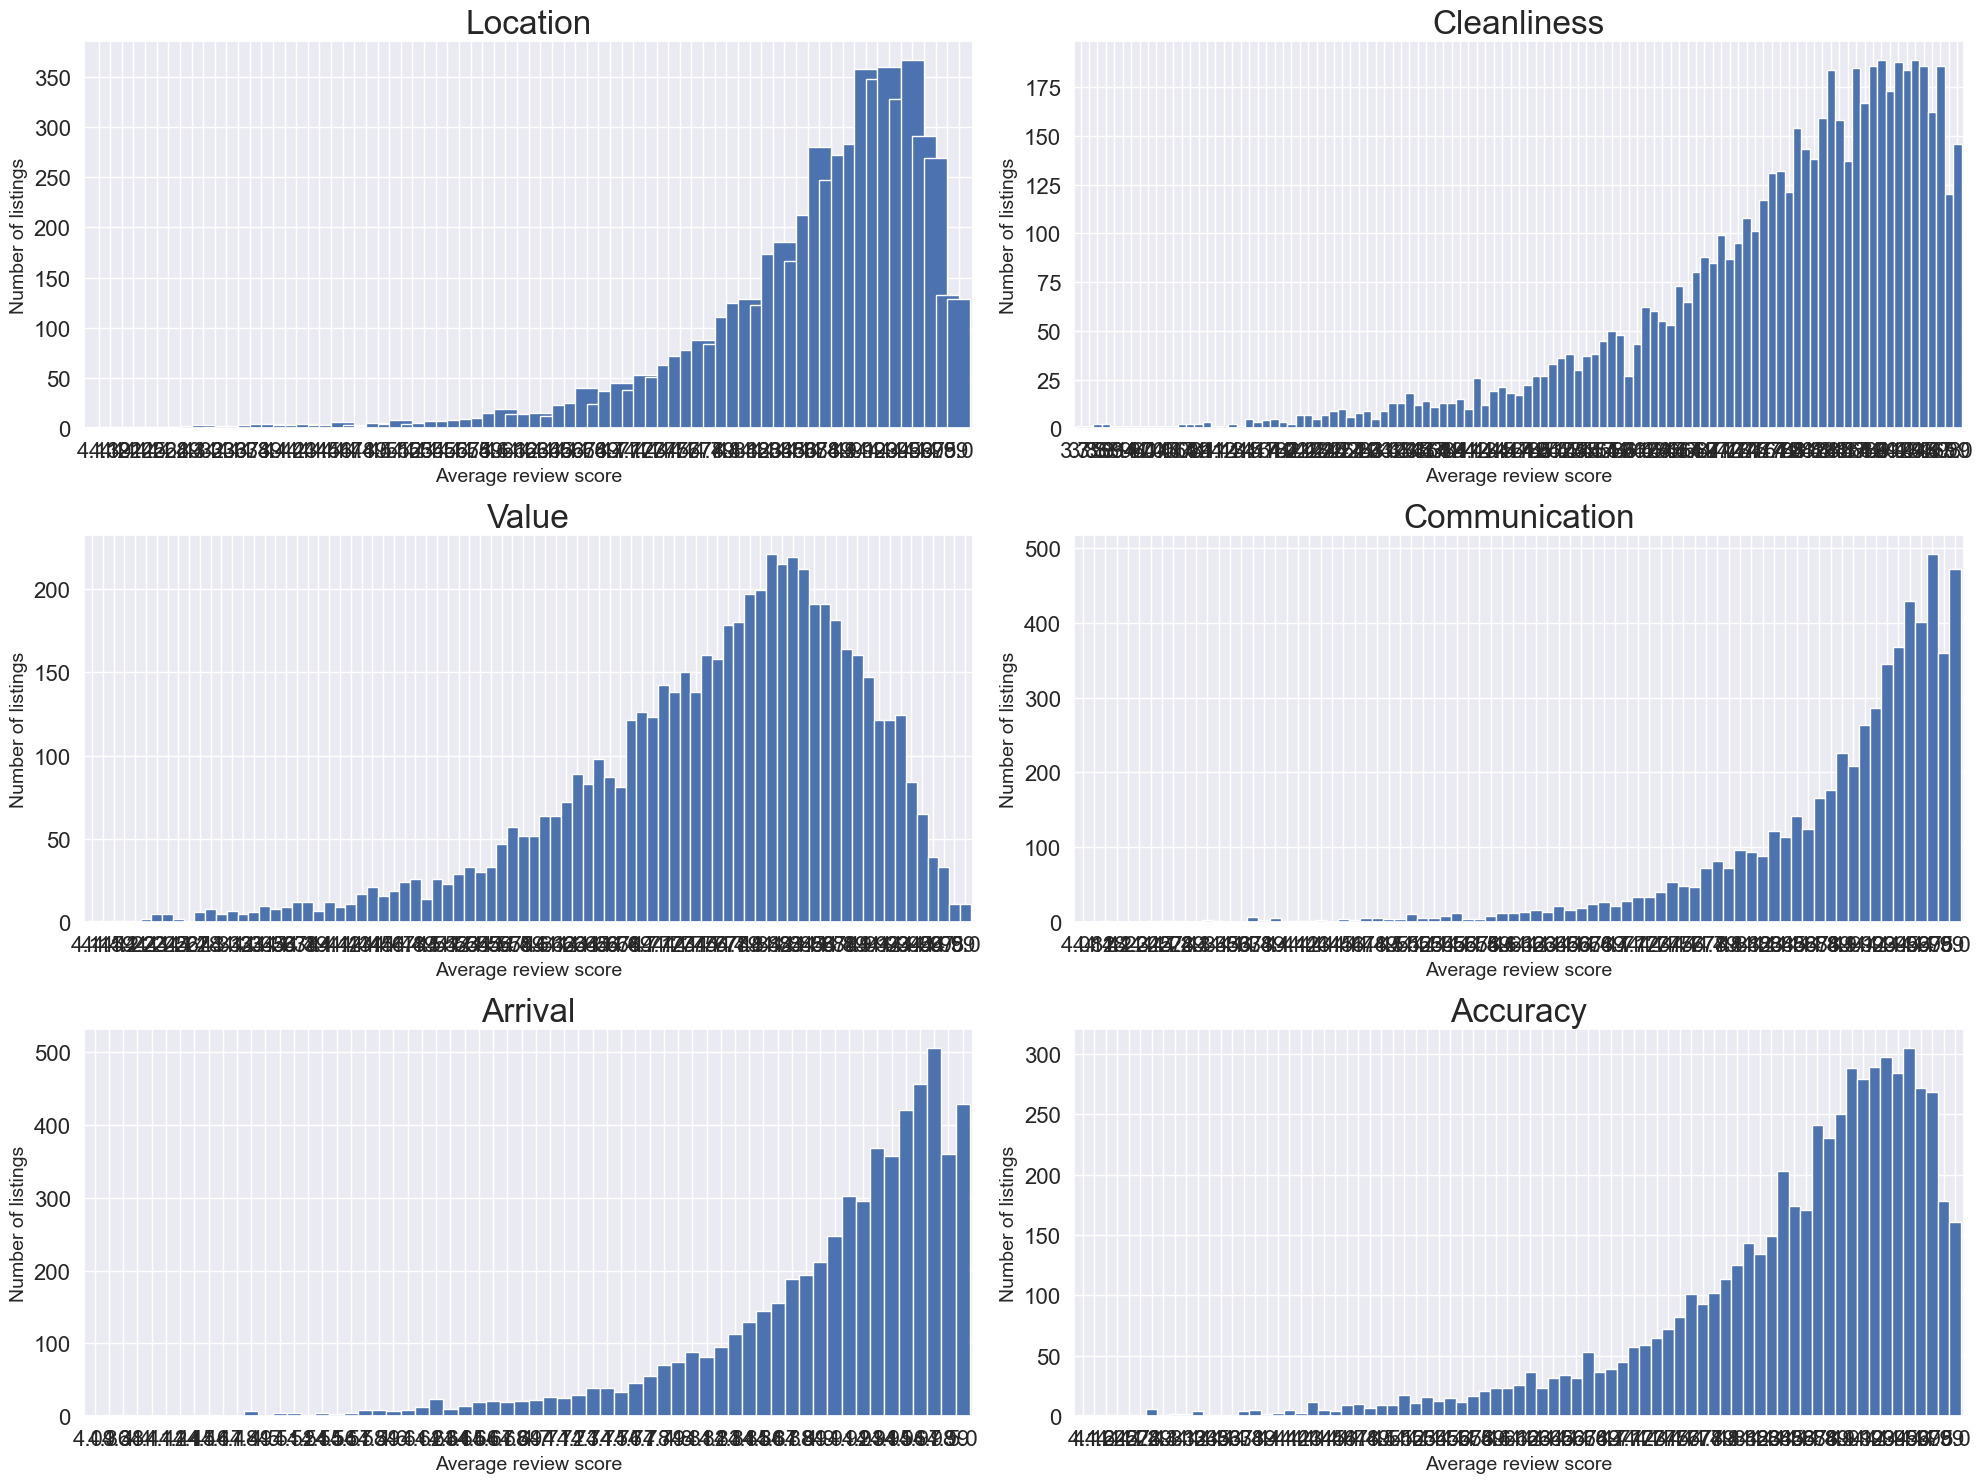

In [43]:
listings10 = listings[listings['number_of_reviews']>=50]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=2, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## 4.5. Encontrando buenos hospedadores

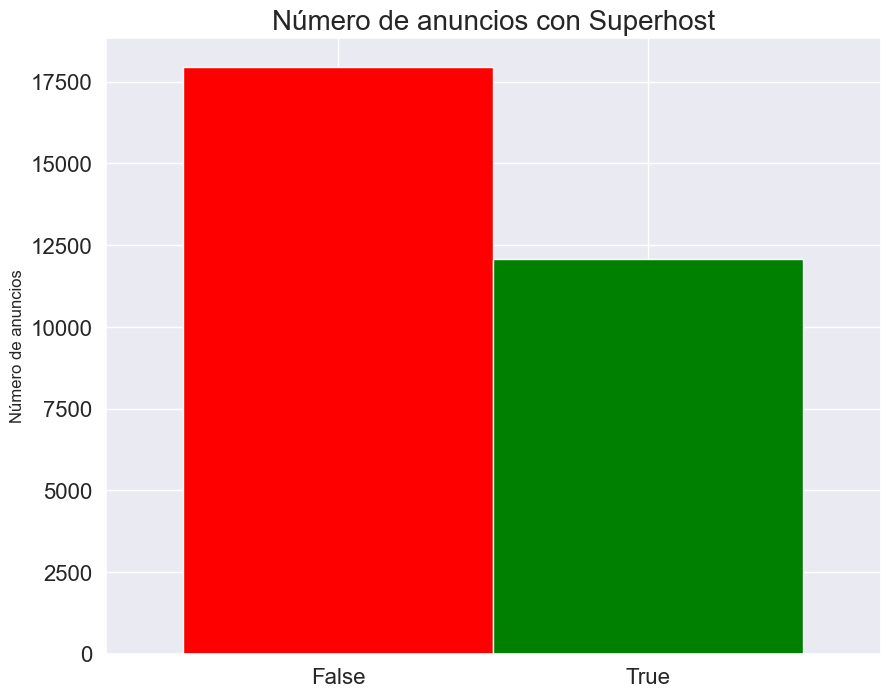

In [40]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "Superhost", "f": "No"})

feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0, color=['red', 'green'])
plt.title("Número de anuncios con Superhost", fontsize=20)
plt.ylabel('Número de anuncios', fontsize=12)
plt.show()

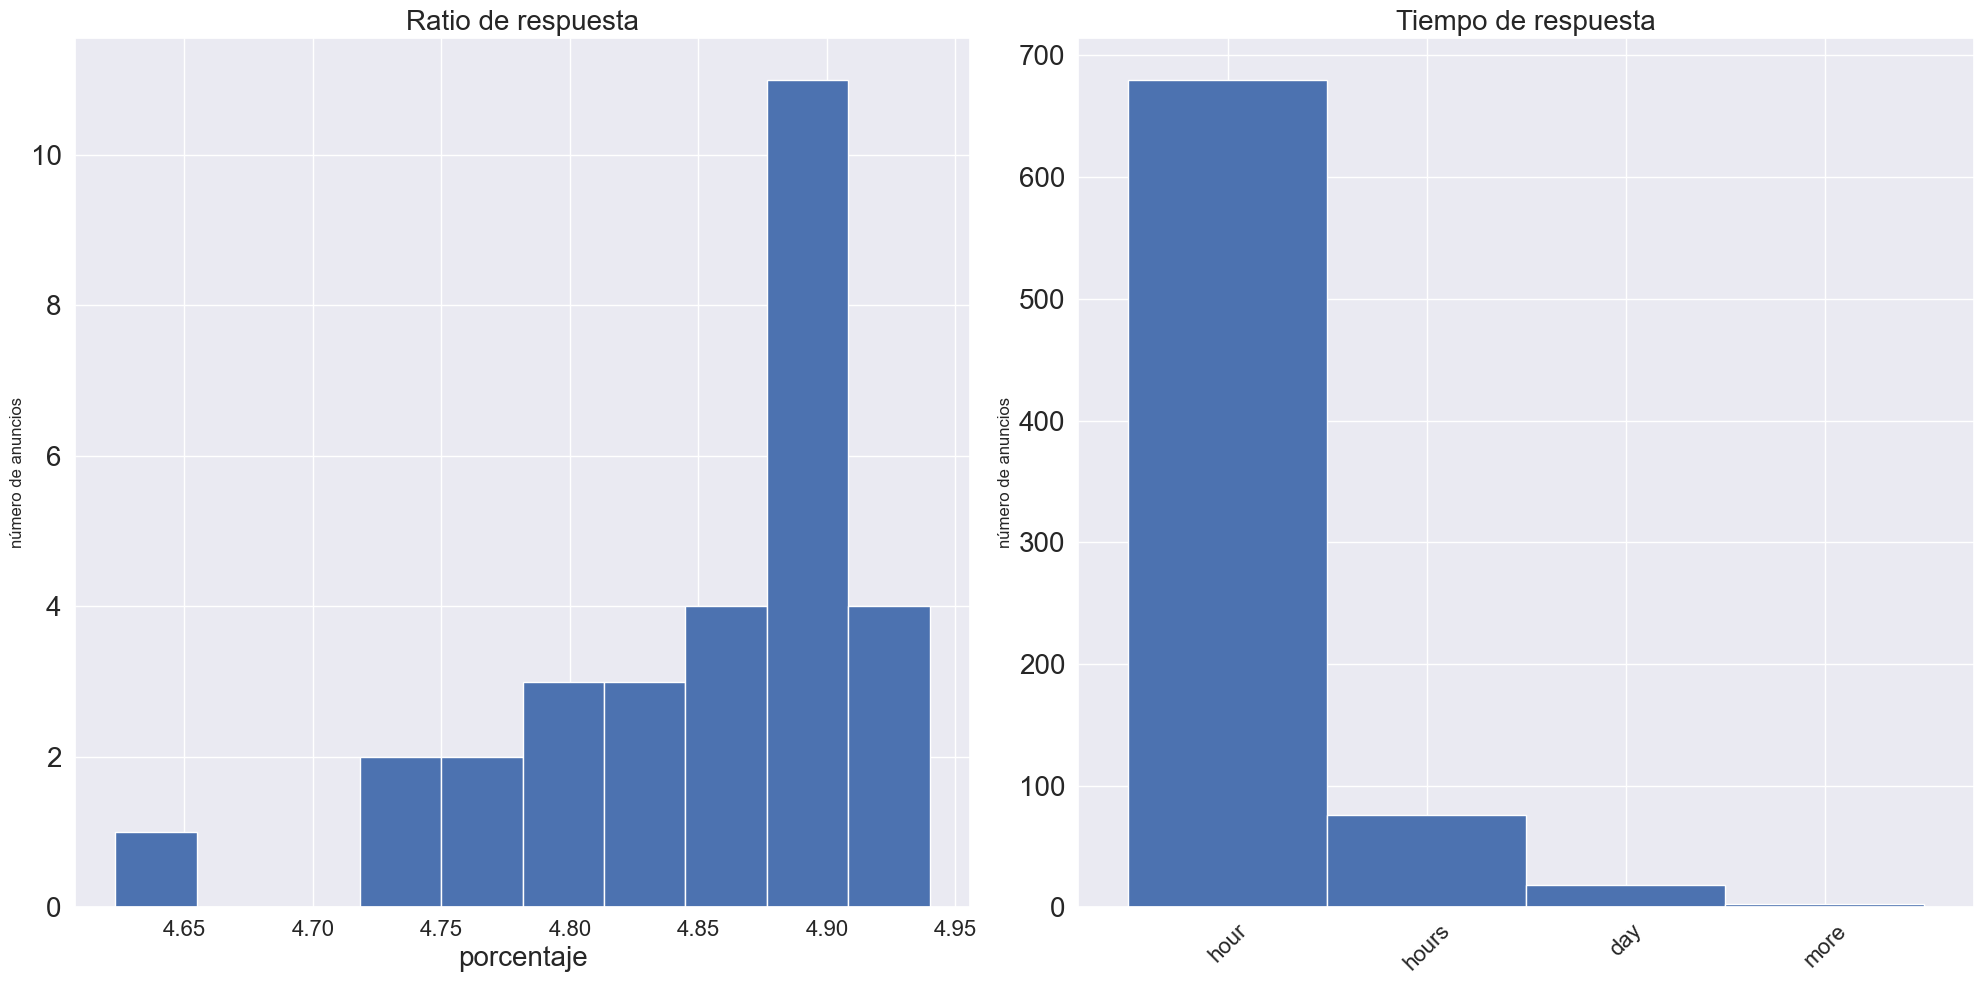

In [42]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)

ax1= plt.hist(feq1)
plt.title("Ratio de respuesta", fontsize=20)
plt.ylabel("número de anuncios")
plt.xlabel("porcentaje", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Tiempo de respuesta", fontsize=20)
plt.ylabel("número de anuncios")

plt.tight_layout()
plt.show()

## 4.6. Disponibilidad en el tiempo

In [45]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar.head()

date available  price adjusted_price  minimum_nights  \
listing_id                                                              
3002       2022-12-16         f  110.0        $110.00             4.0   
3002       2022-12-17         t   85.0         $85.00             4.0   
3002       2022-12-18         f  110.0        $110.00             4.0   
3002       2022-12-19         f  110.0        $110.00             4.0   
3002       2022-12-20         f  110.0        $110.00             4.0   

            maximum_nights  
listing_id                  
3002                   8.0  
3002                   8.0  
3002                   8.0  
3002                   8.0  
3002                   8.0

In [46]:
print(calendar.shape)

(10973361, 6)


In [47]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

date available  price adjusted_price  minimum_nights  \
listing_id                                                                      
638574041625365217 2023-08-12         t  149.0        $149.00             2.0   
677499981321539568 2023-05-03         f  578.0        $578.00             2.0   
53993472           2023-11-22         t   95.0         $95.00             2.0   
19642426           2023-04-28         f  110.0        $110.00             1.0   
52394501           2023-01-22         f  494.0        $494.00             4.0   
52621232           2023-06-01         f  260.0        $260.00             3.0   
47494460           2023-07-17         t  129.0        $129.00             4.0   
635397845057986586 2023-11-06         f  389.0        $389.00             3.0   
23777058           2023-04-14         t  351.0        $351.00             4.0   
669182541004310803 2023-03-24         f  400.0        $400.00            29.0   
49813818           2023-10-07         t   99.0         $99.00             1.0   
735438581890480472 2023-03-13         f  278.0        $278.00             7.0   
32338826           2023-05-20         t  337.0        $337.00             5.0   
17902375           2023-01-23         f  100.0        $100.00            30.0   
556886387716168751 2023-02-04         f   99.0         $99.00            14.0   

                    maximum_nights  accommodates  
listing_id                                        
638574041625365217            14.0           6.0  
677499981321539568           365.0           6.0  
53993472                    1125.0           2.0  
19642426                    1125.0           4.0  
52394501                     365.0           4.0  
52621232                    1125.0           6.0  
47494460                      46.0           2.0  
635397845057986586          1125.0           6.0  
23777058                     179.0           6.0  
669182541004310803           365.0           3.0  
49813818                      60.0           3.0  
735438581890480472             7.0           6.0  
32338826                     365.0           4.0  
17902375                    1125.0           3.0  
556886387716168751          1125.0           3.0

In [48]:
import plotly.io as pio

In [49]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Fecha', yTitle = 'Anuncios disponibles',\
                   text='weekday', title = 'Numero de anuncios disponibles por fecha')

## 4.7. Precio medio por día

In [53]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Fecha', yTitle='Precio',
    text='weekday', title='Precio medio disponible para dos personas por fecha')

## 4.8. Lugares de interés para el turista

In [ ]:
lugares = pd.DataFrame(columns=['Nombre', 'Tipo', 'Latitud', 'Longitud'])

# Agregar datos al dataframe
lugares.loc[0] = ["Hanauma bay",  'Playa',21.271171185401922, -157.69728551032878]
lugares.loc[1] = ["Waikiki", 'Playa',21.279870963097483, -157.8362387738034]
lugares.loc[2] = ["Haleiwa", 'Pueblo surfero',21.594024254988163, -158.10802775675674]
lugares.loc[3] = ["Pearl Harbor", 'Monumento',21.352927644773107, -157.98042457029678]
lugares.loc[4] = ["Jardín botánico Ho'omaluhia", 'Lugar de interés',21.387232835295592, -157.80503207670228]
lugares.loc[5] = ["Volcán Haleakala", 'Volcán',20.720853965597406, -156.1564008855062]
lugares.loc[6] = ["Isla de molokai ", 'Lugar de interés',21.143930007560613, -157.02938119955925]
lugares.loc[7] = ["Volcán Mauna Loa", 'Volcán',19.475161597678053, -155.59051337825235]
lugares.loc[8] = ["Parque nacional de los volcanes", 'Volcán',19.424490811799416, -155.28637370643787]
lugares.loc[9] = ["Valle del Waipi'o ", 'Playa',20.11415482719455, -155.59280318666177]
lugares.loc[10] = ["Cañón de Waimea ", 'Lugar de interés',22.072857450283788, -159.66526870807212]
lugares.loc[11] = ["Monumento Diamond head state", 'Monumento',21.264058299460334, -157.80423379140333]
lugares.loc[12] = ["Lolani palacio", 'Monumento',21.306937104788776, -157.85873751548655]
lugares.loc[13] = ["Crater Haleakala", 'Volcán',20.71036368958066, -156.2533417037348]

lugares.head()
lugares.to_csv('lugares.csv')

In [ ]:
m = folium.Map(location=[19.741755, -155.844437], zoom_start=7.4, tiles="OpenStreetMap")

for lat, lon, nombre, tipo in zip(lugares['Latitud'],lugares['Longitud'],lugares['Nombre'],lugares['Tipo']):
  marker_color = 'green'
  
 
  folium.Marker(
    [lat, lon], popup=f"<b>Nombre: {nombre} <br>Tipo: {tipo}</b>",
    icon=folium.Icon(color=marker_color, icon = 'star')
).add_to(m)


m

### Comprobar viviendas que superan los 90 días permitidos. HECHO

### Modelos de regresión

### Lugares marcados en mapa (playas, volcanes, monumentos)

### Mirar también por review score

### Legislación Airbnb Haawaii: https://realhawaii.co/blog/airbnb-on-hawaii-what-is-and-isnt-legal

### https://awning.com/post/hawaii-short-term-rental-laws


# 5. Reviews

## 5.1. Análisis de las reviews

In [18]:
reviews_details.shape

(961631, 6)

In [19]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], left_on = "listing_id", right_index=True, how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

listing_id                                               name  \
id                                                                      
63686         3002  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
71254         3002  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
132520        3002  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
158315        3002  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   
168133        3002  OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...   

        host_id host_name        date  reviewer_id reviewer_name  \
id                                                                 
63686      3364     Lynne  2010-07-11       155310        Debbie   
71254      3364     Lynne  2010-07-31        75939        Bonnie   
132520     3364     Lynne  2010-11-02       189930     Alexandra   
158315     3364     Lynne  2010-12-25       291487       Shirley   
168133     3364     Lynne  2011-01-08       331679     Elizabeth   

                                                 comments  
id                                                         
63686   Lynne is very kind and accommodating, the loca...  
71254   I came back to the island on my own for my 25t...  
132520  I had a wonderfull time in Hawaii. Lynne is a ...  
158315  Lynn was a wonderful hostess and is a lovely, ...  
168133  Just a short walk to Waikiki beach, restaurant...

In [20]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id   host_name                       
5786717   Viktoria                    8521
113441705 M.P.S.                      6827
15820446  Maui Paradise               6270
111808435 Vacasa                      5786
43793840  Mark                        5515

In [21]:
reviews_details.comments.head()

id
63686     Lynne is very kind and accommodating, the loca...
71254     I came back to the island on my own for my 25t...
132520    I had a wonderfull time in Hawaii. Lynne is a ...
158315    Lynn was a wonderful hostess and is a lovely, ...
168133    Just a short walk to Waikiki beach, restaurant...
Name: comments, dtype: object

In [22]:
reviews_details.comments.values[2] #print comment with numbers and windows line break

'I had a wonderfull time in Hawaii. Lynne is a super-super host and very welcoming:)! I really enjoy my stay in her flat. The location is perfect, just in the center, and the flat is nice and quiet:)'

In [23]:
import nltk
nltk.download('stopwords')
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrollamaslopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'wonderfull time hawaii lynne super super host welcoming really enjoy stay flat location perfect center flat nice quiet '

In [24]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
8         great  611490
81           br  542705
30        place  520120
63         stay  482281
3      location  387045
35        beach  372475
184       clean  257086
136       would  233532
32   everything  222169
46         nice  196616

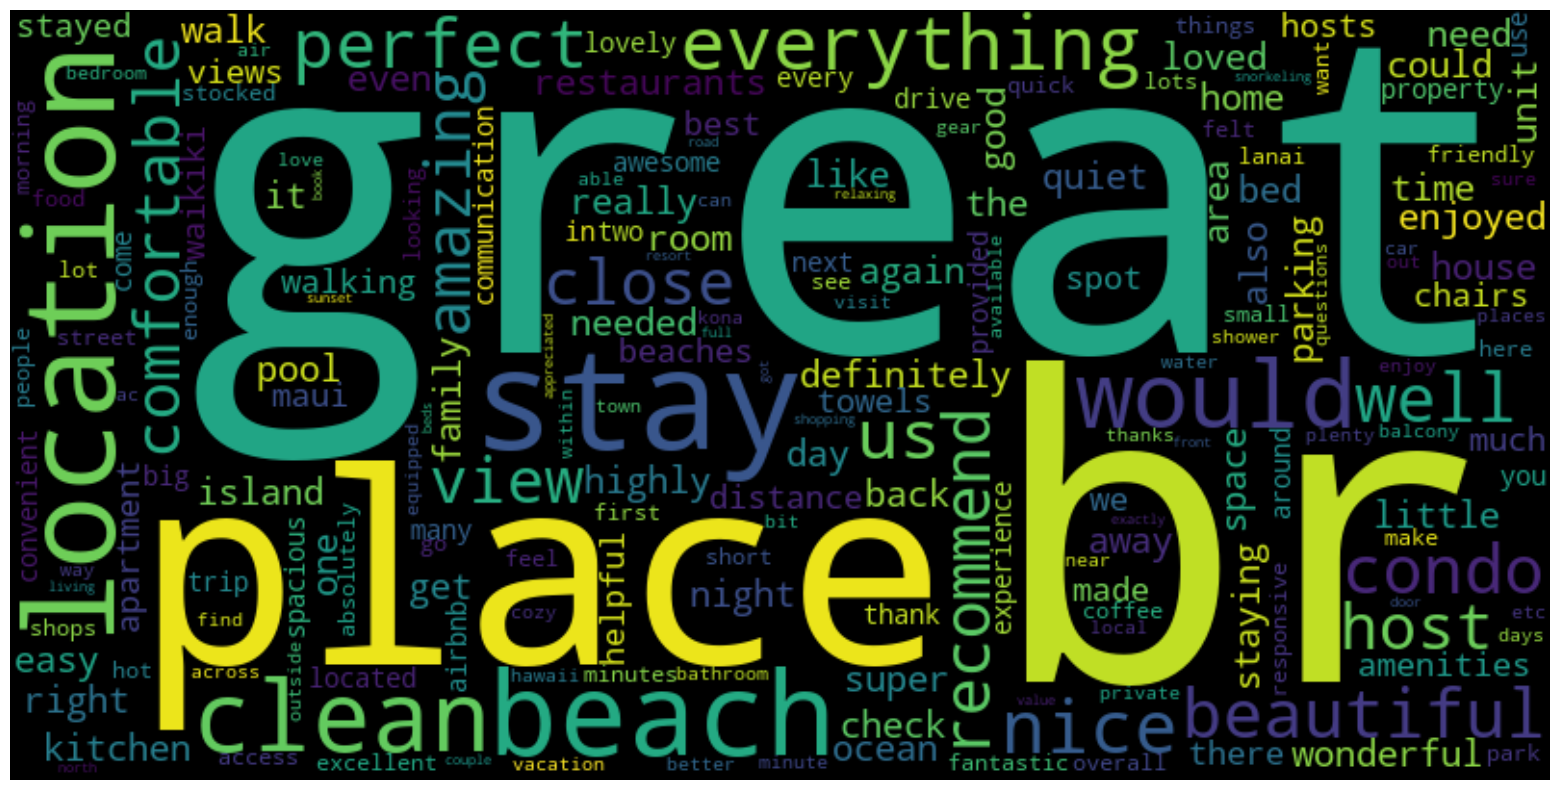

In [25]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

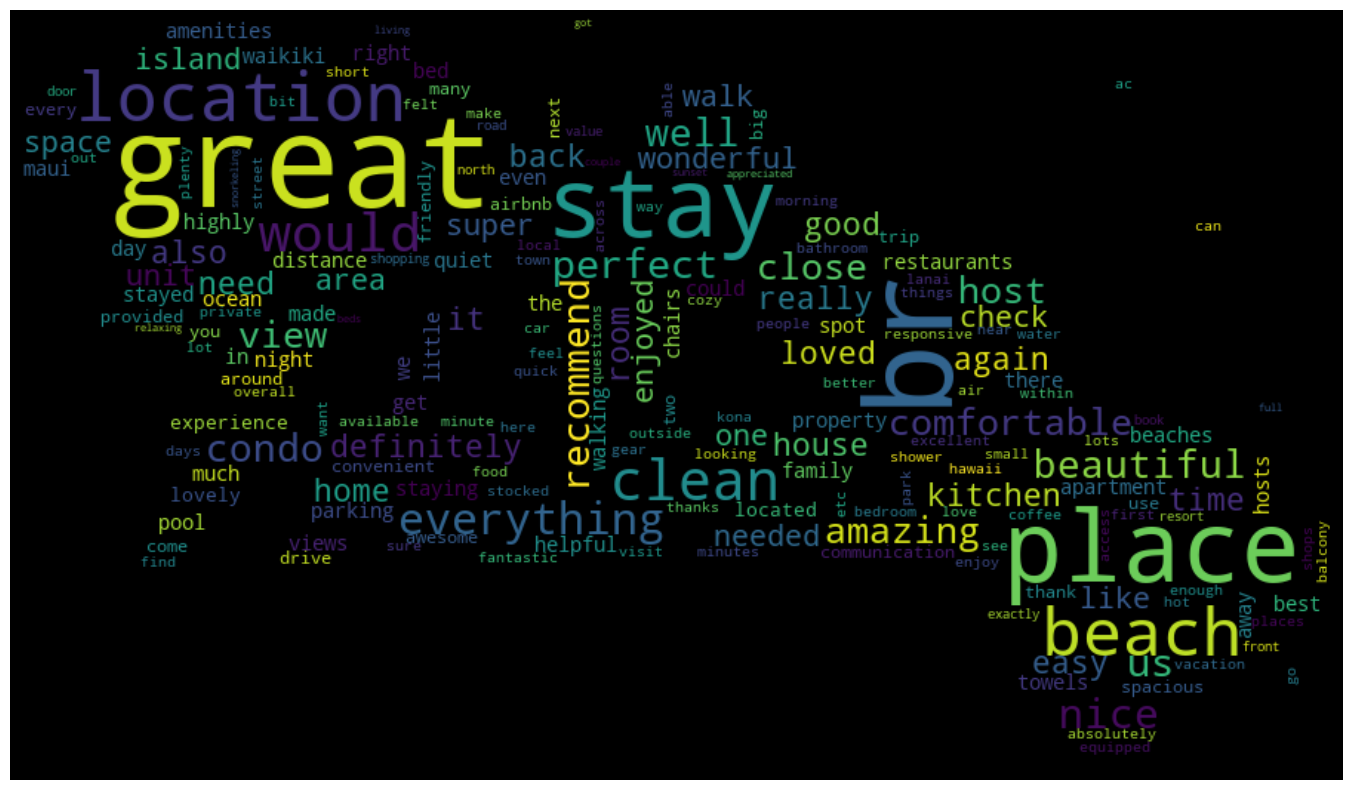

In [38]:
from PIL import Image
mask = np.array(Image.open('img/text_hawaii.png'))
wordcloud = WordCloud(width=800, height=400, mask=mask)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()